# 2 Gridworld

In [1]:
import numpy as np
import tut_basics as tb

from plot_fxns import plotWorld, plotStateValue, plotStateActionValue, plotPolicyPi, plotGreedyPolicyQ
from rl_agents import RLAgent, RLExampleAgent
import importlib

### 2.0 Build A Gridworld with Random Agent

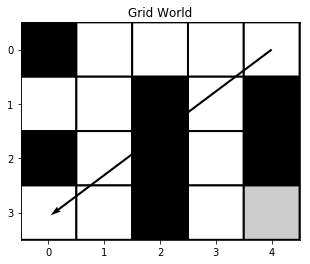

In [2]:
# build and plot world
world = tb.GridWorldExample1()
plotWorld(world)

In [4]:
# initialize an agent and run an episode (see program printout)
agent = RLExampleAgent(world)
tb.run_episode(agent, print_details = True)

Running episode...
Step 1: move from (3,0) to (3,1), reward = 0.00
Step 2: move from (3,1) to (3,0), reward = 0.00
Step 3: move from (3,0) to (3,1), reward = 0.00
Step 4: move from (3,1) to (2,1), reward = 0.00
Step 5: move from (2,1) to (3,1), reward = 0.00
Step 6: move from (3,1) to (2,1), reward = 0.00
Step 7: move from (2,1) to (3,1), reward = 0.00
Step 8: move from (3,1) to (3,0), reward = 0.00
Step 9: move from (3,0) to (3,1), reward = 0.00
Step 10: move from (3,1) to (3,0), reward = 0.00
Step 11: move from (3,0) to (3,1), reward = 0.00
Step 12: move from (3,1) to (3,0), reward = 0.00
Step 13: move from (3,0) to (3,1), reward = 0.00
Step 14: move from (3,1) to (2,1), reward = 0.00
Step 15: move from (2,1) to (1,1), reward = 0.00
Step 16: move from (1,1) to (1,0), reward = 0.00
Step 17: move from (1,0) to (1,1), reward = 0.00
Step 18: move from (1,1) to (2,1), reward = 0.00
Step 19: move from (2,1) to (1,1), reward = 0.00
Step 20: move from (1,1) to (2,1), reward = 0.00
Step 21: m

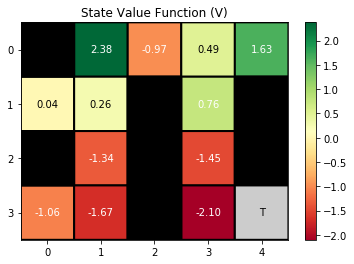

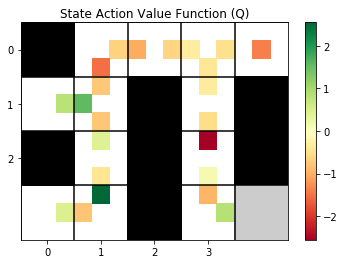

In [5]:
# plot value functions
plotStateValue(agent.v, world)
plotStateActionValue(agent.q, world)

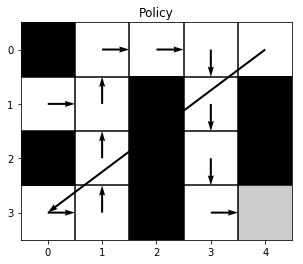

In [6]:
# plot policy map
plotPolicyPi(agent.Ppi, world)

### 2.1 Dynamic Programming

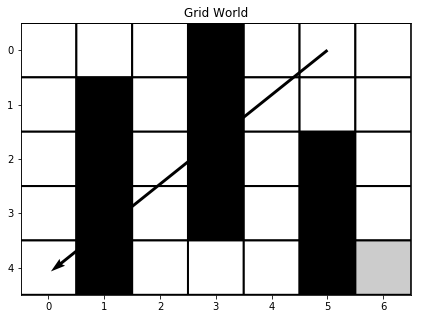

In [7]:
# build and plot a new world
world = tb.GridWorldExample2()
plotWorld(world)

In [ ]:
### ASSIGNMENT Q 2.1
class DP_Agent(RLAgent):
    """Dynamic Programming (DP) agent."""

    def initRandomPolicy(self):
        """
        Build the matrix P_pi = sum_a pi(a|s)*Pr_a(s'|s)
        (See tutorial slides 13-15)"""
        Psum = self.world.P.sum(axis=0)
        Pnorm = Psum.sum(axis=1)
        zero_idxs = Pnorm==0.0
        Pnorm[zero_idxs] = 1.0
        self.P_pi = (Psum.T / Pnorm).T

    #### ASSIGNMENT Q 2.1.1
    def evaluatePolicy(self, gamma):
        """
        This method updates the value function with respect to the current policy.
        Note that you don't need to explicitly use / call the policy!
        The agent should have an attribute 'P_pi'...
        INPUTS: 
        gamma: future decay weighting 
        OUTPUTS:
        N/A
        """
        delta = 1
        maxiters = 1000  # maximum number of iterations
        itr = 0

        while(delta > 0.001 and itr < maxiters):
            itr += 1
            v_new = self.world.R + gamma*(self.P_pi.dot(self.v)) 
            delta = np.max(np.abs(v_new - self.v))
            self.v = v_new
                      

            # HINTS: initialise an update-difference tolerance, 'delta' and check at each
            # iteration if the difference between the new and previous value vectors
            # is below some tolerance...

    #### ASSIGNMENT Q 2.1.2
    def improvePolicy(self):
        """
        This method should improve the policy by making it greedy with respect to the
        value function.
        INPUTS / OUTPUTS: N/A
        """
        self.P_pi = np.zeros((self.world.nstates,self.world.nstates))
        # initialise a 'new' self.P_pi of zeros.
        for s in range(self.world.nstates):
            # transitions = possible transitions from this state (a property of the 'world')
            transitions = np.sum(self.world.P[:,s,:],axis=0).astype(bool)
            nextvals = np.full((self.world.nstates,),-1e6)
            nextvals[transitions] = self.v[transitions]
            
            # s_next = whichever available transition state has largest value in self.v...
            s_next = np.argmax(nextvals)
            
            # make self.P_pi[state,s_next] = 1.0
            self.P_pi[s,s_next] = 1
            

    #### ASSIGNMENT Q 2.1.3
    def policyIteration(self, gamma):
        """
        Iterate between policy evaluation and policy improvement until convergence...
        (or until you get bored. Don't let 'while' loops run unrestricted!)
        INPUTS: 
            gamma: future decay weighting
        """
        
        print("Running policy iteration...")
        policyStable = False
        itr = 0
        maxiters = 1000
        while(not policyStable and itr < maxiters):
            itr += 1
            Ppi_old = self.P_pi
            self.evaluatePolicy(gamma)
            self.improvePolicy()
            policyStable = np.array_equal(Ppi_old,self.P_pi)
        print("Converged after %d iterations." % itr)


In [ ]:
agent = DP_Agent(world)
# set your discount factor
gamma = 0.99
# initialize agent with random policy
agent.initRandomPolicy()
# do policy evaluation and improvment
agent.policyIteration(gamma)

In [ ]:
# plot value function
plotStateValue(agent.v, world)
# plot policy map
plotPolicyPi(agent.P_pi, world)

### 2.2 Temporal Difference Learning

In [ ]:
### ASSIGNMENT Q 2.2
class TDSarsa_Agent(RLAgent):
    def __init__(self, world):
        super(TDSarsa_Agent, self).__init__(world)
        self.policy = '''TO DO: SET POLICY USED BY TD SARSA AGENT '''

    ### ASSIGNMENT Q 2.2.1
    def evaluatePolicyQ(self, gamma, alpha, ntrials):
        """
        This module (should) implement Q-function policy evaluation.
        INPUTS: 
            gamma: future decay weighting 
            alpha:learning rate
            ntrials: number of trials
        """
        delta = 1.0 # after each trial, update this to the 'difference' between the old and new policy. Stop if it gets below some tolerance?
        pass

    ### ASSIGNMENT Q 2.2.2
    def policyIteration(self, gamma, alpha, ntrials):
        """
        Implements policy iteration: flopping between policy evaluation and policy improvement.
        INPUTS: 
            gamma: future decay weighting 
            alpha:learning rate
            ntrials: number of trials
        """
        print("Running TD policy iteration...")
        pass
        #print("Converged after {} iterations.".format(number_of_iterations)

In [ ]:
world = tb.GridWorldExample3()
agent = TDSarsa_Agent(world)

gamma = 0.99
alpha = 0.2
ntrials = 500
agent.evaluatePolicyQ(gamma, alpha, ntrials)
agent.policyIteration(gamma, alpha, ntrials)

plotStateActionValue(agent.q,world)

### 2.3 Off-Policy Temporal Difference (TD) -- Q Learning

Here you will compare Q learning with SARSA from above. Which one is better, and why? Plot the Q-values and policies for the two. Run 100 episodes of each after learning, and compare average total return for each episode. Which algorithm receives more reward on average? 

In [ ]:
### ASSIGNMENT Q 2.3
class TDQ_Agent(TDSarsa_Agent):
    """ Q-learning agent. Can learn 'off-policy'"""
    def __init__(self, world):
        super(TDQ_Agent, self).__init__(world)
        '''TO DO: set  policies'''
        self.policy = 
        self.offpolicy = 

    # ASSIGNMENT Q 2.3.1
    def choose_offpolicy_action(self):
        state = self.world.get_state()
        actions = self.world.get_actions()
        self.action = self.offpolicy(state, actions)
        return self.action

    # ASSIGNMENT Q 2.3.2
    def evaluatePolicyQ(self, gamma, alpha, ntrials):
            """
            Evaluate the policy for Q-learning. Remember we must be able to choose
            'off-policy' actions to explore, but we should update with on-policy actions!
            INPUTS: 
                gamma: future decay weighting 
                alpha: learning rate
                ntrials: number of trials
            """
            pass
    ### ASSIGNMENT Q 2.3.3
    def policyIteration(self, '''add relevant arguements'''):
        '''
        Write a policy iteration function as in earlier agents. Make sure to include relevant inputs
        '''


In [ ]:
from tut_basics import CliffWorld
world = CliffWorld()
# test Q Agent 
q_agent = TDQ_Agent(world)
alpha = 0.05
ntrials = 2000
gamma = 0.9
q_agent.policyIteration(gamma, alpha, ntrials)
plotStateActionValue(q_agent.q,world)
plotGreedyPolicyQ(q_agent.q,world)

In [ ]:
# compare control with Q learner against control with SARSA
world = CliffWorld()
sarsa_agent = TDSarsa_Agent(world)
alpha = 0.2
ntrials = 2000
gamma = 0.9
sarsa_agent.policyIteration(gamma, alpha, ntrials)
plotStateActionValue(sarsa_agent.q,world)
plotGreedyPolicyQ(sarsa_agent.q,world)

### 2.4 TD Lambda 

In [ ]:
# ASSIGNMENT Q 2.4 
class TDSarsaLambda_Agent(TDSarsa_Agent):
    def __init__(self, world, lamb):
        super(TDSarsaLambda_Agent, self).__init__(world)
        self.policy = self.epsilongreedyQPolicy
        self.lamb = lamb

    # ASSIGNMENT Q 2.4.1
    def evaluatePolicyQ(self, gamma, alpha, ntrials):
        """
        Evaluate the policy for TD-SARSA-learning. 
        Remember we must store eligibility traces!
        INPUTS: 
            gamma: future decay weighting 
            alpha: learning rate
            ntrials: number of trials
        """
        pass
    ## ASSIGNMENT Q 2.4.2
    def policyIteration(self, '''add relevant arguements'''):
        '''
        Write a policy iteration function as in earlier agents. Make sure to include relevant inputs
        '''
        pass

In [ ]:
from tut_basics import GridWorldExample2

world = GridWorldExample2()

# 1. test policy evaluation for one trial (episode)
lamb = 0.9
agent = TDSarsaLambda_Agent(world, lamb)
alpha = 0.05
ntrials = 1
gamma = 0.9
agent.evaluatePolicyQ(gamma, alpha, ntrials)
plotStateActionValue(agent.q,world)

sarsa0_agent = TDSarsa_Agent(world)
sarsa0_agent.evaluatePolicyQ(gamma, alpha, ntrials)
plotStateActionValue(sarsa0_agent.q,world)

In [ ]:
# 2. do policy iteration
ntrials = 10
agent.policyIteration(gamma, alpha, ntrials)
plotStateActionValue(agent.q,world)
plotGreedyPolicyQ(agent.q,world)

sarsa0_agent.policyIteration(gamma, alpha, ntrials)
plotStateActionValue(sarsa0_agent.q,world)
plotGreedyPolicyQ(agent.q,world)